Audio 1 Samples: [0.00158691 0.00204468 0.00164795 ... 0.00811768 0.00775146 0.00708008]
Audio 2 Samples: [ 1.1291504e-03  1.8920898e-03  1.6174316e-03 ...  8.2397461e-04
  6.7138672e-04 -9.1552734e-05]


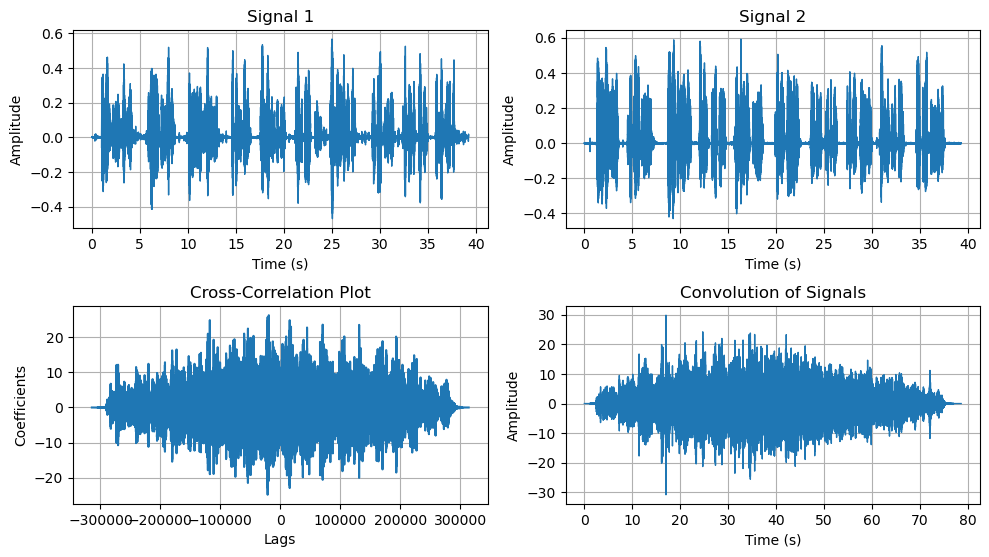

In [8]:
import librosa
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Load audio files with librosa
d_file = "sample1.wav"
d1_file = "sample2.wav"
d, sr = librosa.load(d_file, sr=8000)
d1, sr = librosa.load(d1_file, sr=8000)

# Print array values of the first and second .wav files
print("Audio 1 Samples:", d)
print("Audio 2 Samples:", d1)

# Cross-correlation of the two audio signals
correlation = np.correlate(d, d1, mode="full")
lags = np.arange(-len(d1) + 1, len(d), 1)

# Create subplots
plt.figure(figsize=(10, 8))

# Plot the first audio signal
plt.subplot(3, 2, 1)
t = np.linspace(0, len(d) / sr, len(d))
plt.plot(t, d, lw=1)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal 1')

# Plot the second audio signal
plt.subplot(3, 2, 2)
t = np.linspace(0, len(d1) / sr, len(d1))
plt.plot(t, d1, lw=1)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal 2')

# Plot the cross-correlation
plt.subplot(3, 2, 3)
plt.plot(lags, correlation)
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Coefficients')
plt.title('Cross-Correlation Plot')

# Convolve the two audio signals
y = signal.convolve(d, d1, mode='full')

# Plot the convolved signal
plt.subplot(3, 2, 4)
t = np.linspace(0, len(y) / sr, len(y))
plt.plot(t, y, lw=1)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Convolution of Signals')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
